In [2]:
import math
import datetime as dt
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.feature_selection as chi2
import warnings
warnings.filterwarnings('ignore')

# ML
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [3]:
data = pd.read_csv('UberEarnings.csv')

In [4]:
# Setting catagory column as a new index 
data.set_index('catagory',inplace=True)

In [5]:
data.head()

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-01 15:23:00,0:25:17,7.49,1071,1019,19.31,4.83,1.01,13.47,0.0,0.0,0.0,15,Friday
Saver,2023-12-01 15:56:00,0:12:16,3.45,1019,1093,10.09,1.92,0.40,8.77,0.0,1.0,0.0,15,Friday
UberX,2023-12-01 16:15:00,0:23:12,15.37,1098,1056,32.58,8.15,1.71,22.72,0.0,0.0,0.0,16,Friday
Saver,2023-12-01 16:47:00,0:10:19,2.76,1056,1013,8.77,1.67,0.35,6.75,0.0,0.0,0.0,16,Friday


In [10]:
data.shape

(720, 14)

# Data Cleaning and Formatting

In [29]:
# making a copy
uber = data.copy()

In [31]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, Saver to UberX
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            720 non-null    object 
 1   duration             720 non-null    object 
 2   distance_in_km       720 non-null    float64
 3   pickup_by_postcode   720 non-null    int64  
 4   dropoff_by_postcode  720 non-null    int64  
 5   fare_euro            720 non-null    float64
 6   service_fee_euro     720 non-null    float64
 7   tax                  720 non-null    float64
 8   earnings_euro        720 non-null    float64
 9   third_parties        720 non-null    float64
 10  tip                  720 non-null    float64
 11  promotion            720 non-null    float64
 12  hour                 720 non-null    int64  
 13  day_name             720 non-null    object 
dtypes: float64(8), int64(3), object(3)
memory usage: 84.4+ KB


In [37]:
uber.head(2)

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-01 15:23:00,0:25:17,7.49,1071,1019,19.31,4.83,1.01,13.47,0.0,0.0,0.0,15,Friday


In [ ]:
# combine two columns in to one 'date' column
uber['date'] = uber['date'] + ' ' + uber['time']
uber.head()

In [ ]:
# droping 'time' column
uber = uber.drop('time', axis='columns')

In [21]:
# renaming column name
uber.columns = uber.columns.str.replace('date', 'date_time')

In [41]:
# Formatting data types
uber['date_time'] = pd.to_datetime(uber.date_time)
uber = uber.astype({
    'distance_in_km': float,
    'pickup_by_postcode': int,
    'dropoff_by_postcode': int,
    'tax': float
})
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, Saver to UberX
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            720 non-null    datetime64[ns]
 1   duration             720 non-null    object        
 2   distance_in_km       720 non-null    float64       
 3   pickup_by_postcode   720 non-null    int64         
 4   dropoff_by_postcode  720 non-null    int64         
 5   fare_euro            720 non-null    float64       
 6   service_fee_euro     720 non-null    float64       
 7   tax                  720 non-null    float64       
 8   earnings_euro        720 non-null    float64       
 9   third_parties        720 non-null    float64       
 10  tip                  720 non-null    float64       
 11  promotion            720 non-null    float64       
 12  hour                 720 non-null    int64         
 13  day_name             720 non-null 

In [43]:
uber.isnull().sum()

date_time              0
duration               0
distance_in_km         0
pickup_by_postcode     0
dropoff_by_postcode    0
fare_euro              0
service_fee_euro       0
tax                    0
earnings_euro          0
third_parties          0
tip                    0
promotion              0
hour                   0
day_name               0
dtype: int64

In [45]:
# replacing null values with 0.
uber = uber.fillna('0')

In [47]:
# check if there are duplicates. we have found two but that might be the areacode.
uber.duplicated().sum()

2

# Data Manipulation

In [50]:
uber.head()

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-01 15:23:00,0:25:17,7.49,1071,1019,19.31,4.83,1.01,13.47,0.0,0.0,0.0,15,Friday
Saver,2023-12-01 15:56:00,0:12:16,3.45,1019,1093,10.09,1.92,0.40,8.77,0.0,1.0,0.0,15,Friday
UberX,2023-12-01 16:15:00,0:23:12,15.37,1098,1056,32.58,8.15,1.71,22.72,0.0,0.0,0.0,16,Friday
Saver,2023-12-01 16:47:00,0:10:19,2.76,1056,1013,8.77,1.67,0.35,6.75,0.0,0.0,0.0,16,Friday


In [52]:
# earnings based on different catagories
uber.groupby('catagory').agg({'earnings_euro':['mean','max','count','sum']})

earnings_euro                      
                  mean    max count      sum
catagory                                    
Priority     16.768462  26.56    13   217.99
Saver        13.407230  29.48   148  1984.27
UberX        12.671377  40.87   559  7083.30

In [54]:
# The pick hours count
hour_freq = pd.crosstab(index = uber['hour'],
                  columns='count')
hour_freq.head(5)

col_0,count
hour,
0,25
1,16
2,17
3,11
7,11


<Axes: xlabel='hour'>

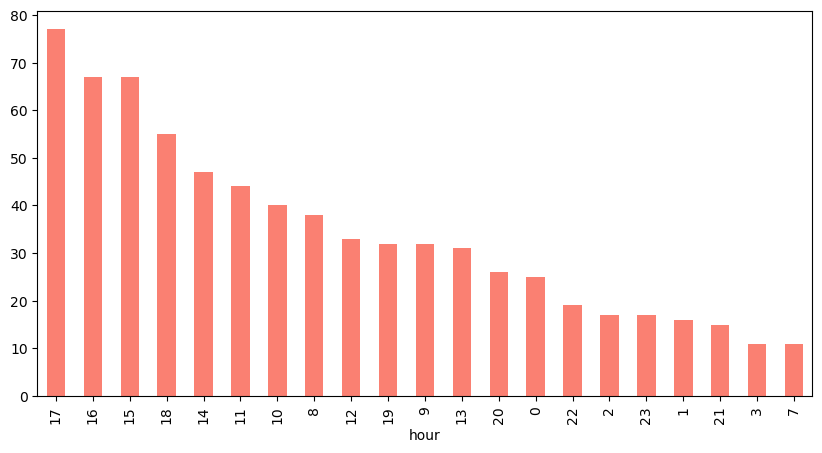

In [56]:
# The pick hours
uber['hour'].value_counts().plot(kind='bar', figsize=(10,5),color='salmon')

In [58]:
# average peopel traveled at each hour of the day
# the average trip distance from shortest to longest for each hour of the day .
uber['hour'] = uber['date_time'].dt.hour
avg_travel_hour = uber.groupby('hour')['distance_in_km'].mean().sort_values().round(2)
avg_travel_hour

hour
2      4.59
23     4.81
20     4.82
22     4.88
18     5.42
3      5.46
17     5.51
19     5.52
0      5.64
16     6.08
13     6.16
15     6.16
21     6.20
1      6.54
11     6.73
14     6.87
12     7.27
9      7.82
10     7.91
8      9.34
7     10.02
Name: distance_in_km, dtype: float64

In [60]:
uber['day_name'] = uber['date_time'].dt.day_name()

In [62]:
# day of the week people travel the Farthest on average
week_day_distance = uber.groupby('day_name')['distance_in_km'].mean().sort_values().round(2)
week_day_distance

day_name
Saturday     5.64
Thursday     5.81
Sunday       6.00
Friday       6.02
Monday       6.75
Tuesday      7.03
Wednesday    7.45
Name: distance_in_km, dtype: float64

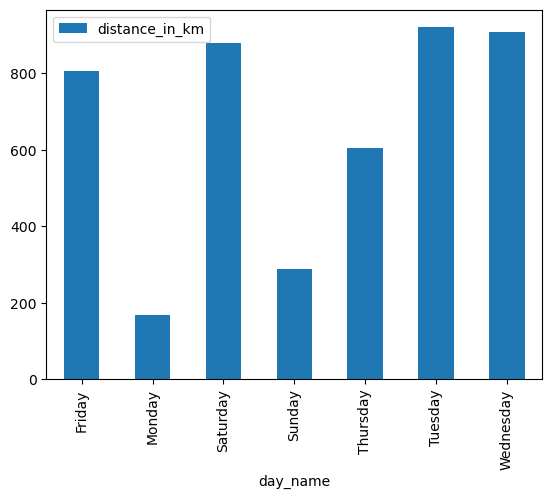

In [64]:
# The total distance in kilometer the driver cover for each day of a week in the last 39 days
distance_by_day = pd.DataFrame(uber['distance_in_km'].groupby(uber['day_name']).sum())
distance_by_day.plot(kind = 'bar')
plt.show()

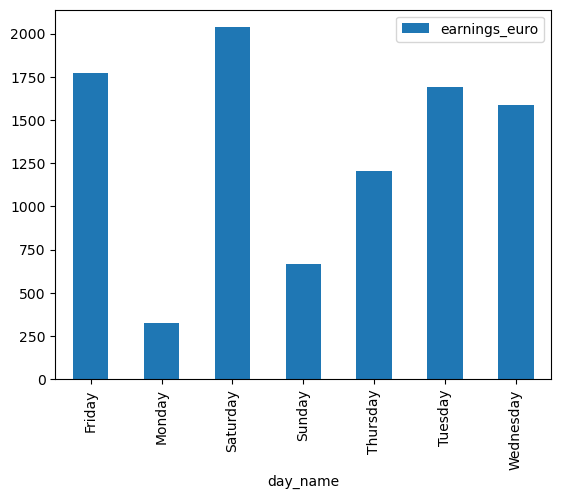

In [66]:
# total earnings in the last 39 days based on week days.
earnings_by_day = pd.DataFrame(uber['earnings_euro'].groupby(uber['day_name']).sum())
earnings_by_day.plot(kind = 'bar')
plt.show()

In [68]:
working_days = pd.crosstab(index = uber['day_name'],
                  columns='count')
working_days

col_0,count
day_name,
Friday,134
Monday,25
Saturday,156
Sunday,48
Thursday,104
Tuesday,131
Wednesday,122


In [70]:
uber.head()

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-01 15:23:00,0:25:17,7.49,1071,1019,19.31,4.83,1.01,13.47,0.0,0.0,0.0,15,Friday
Saver,2023-12-01 15:56:00,0:12:16,3.45,1019,1093,10.09,1.92,0.40,8.77,0.0,1.0,0.0,15,Friday
UberX,2023-12-01 16:15:00,0:23:12,15.37,1098,1056,32.58,8.15,1.71,22.72,0.0,0.0,0.0,16,Friday
Saver,2023-12-01 16:47:00,0:10:19,2.76,1056,1013,8.77,1.67,0.35,6.75,0.0,0.0,0.0,16,Friday


In [72]:
# No of trips on each day of the week
trips = working_days.sort_values(by=['count'],ascending=False)
trips

col_0,count
day_name,
Saturday,156
Friday,134
Tuesday,131
Wednesday,122
Thursday,104
Sunday,48
Monday,25


In [74]:
# Average trip in a day from the past 39 days
trips.sum() / 39

col_0
count    18.461538
dtype: float64

In [76]:
# from longest to shortest trip duration
longest_duration = uber.sort_values(by=['duration'],ascending=False)
longest_duration.head(3)

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
UberX,2023-12-14 18:41:00,0:52:20,12.92,1012,1114,35.24,8.81,1.85,24.58,0.0,0.0,25.0,18,Thursday
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-07 17:24:00,0:42:13,9.15,1076,1012,24.65,6.16,1.29,22.20,0.0,0.0,5.0,17,Thursday


In [78]:
# Distance covered by the driver on each trip from longest to shortest.
longest_trip = uber.nlargest(5,'distance_in_km')
longest_trip

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
UberX,2023-12-18 12:59:00,0:24:38,27.54,1118,1031,44.05,10.94,3.02,30.09,6.47,0.0,0.0,12,Monday
UberX,2024-01-03 16:53:00,0:27:20,25.36,1033,1118,41.72,10.43,2.19,29.10,0.00,0.0,0.0,16,Wednesday
UberX,2024-01-05 17:04:00,0:21:01,24.28,1019,1118,41.86,10.47,2.20,31.19,2.20,0.0,0.0,17,Friday
UberX,2024-01-04 10:14:00,0:29:41,23.20,1017,1118,31.54,7.89,1.66,21.99,0.00,0.0,0.0,10,Thursday
UberX,2023-12-19 11:26:00,0:25:26,22.60,1118,1018,41.09,10.20,2.86,28.03,6.31,0.0,0.0,11,Tuesday


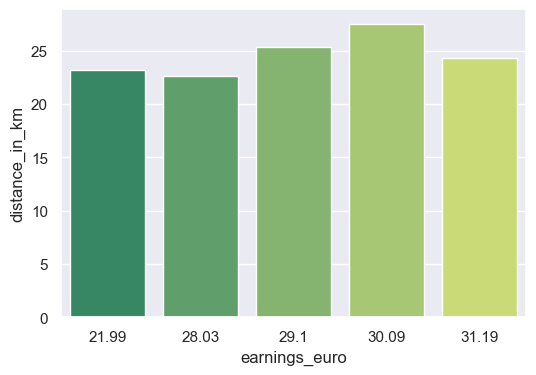

In [80]:
# relation between distance_in_km Vs. earnings.
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.barplot(x='earnings_euro', y='distance_in_km', data=longest_trip, palette='summer', orient='v')

In [82]:
freq = pd.crosstab(index = uber['pickup_by_postcode'],
                  columns='count')
freq

col_0,count
pickup_by_postcode,
1011,17
1012,40
1013,30
1014,6
1015,22
...,...
1185,12
1186,13
1187,7


In [84]:
# From the busiest area to pick up to the list busiest.
pickups = freq.sort_values(by=['count'],ascending=False)
pickups

col_0,count
pickup_by_postcode,
1071,41
1012,40
1016,39
1017,39
1013,30
...,...
1105,1
1099,1
1068,1


In [86]:
top_five_pickups = pickups.nlargest(5, 'count')
top_five_pickups

col_0,count
pickup_by_postcode,
1071,41
1012,40
1016,39
1017,39
1013,30


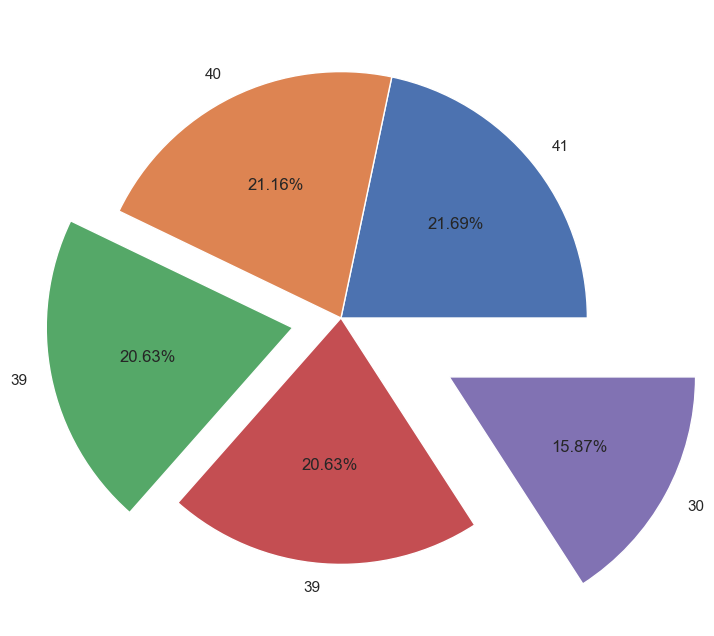

In [88]:
plt.figure(figsize = (10, 8))
plt.pie(top_five_pickups['count'],
       labels = top_five_pickups['count'].values,
       autopct = '%.2f%%',
       explode = [0, 0, 0.2, 0, 0.5 ])
plt.show()

In [90]:
# the most common drop off locations.
most_dropoffs = pd.Series(uber['dropoff_by_postcode']).value_counts()
most_dropoffs

dropoff_by_postcode
1012    54
1017    45
1071    36
1013    29
1016    29
        ..
1095     1
1034     1
1106     1
1094     1
1046     1
Name: count, Length: 75, dtype: int64

In [94]:
# measures of centrality for earnings.
uber.describe()['earnings_euro']

count    720.000000
mean      12.896611
min        6.160000
25%        8.717500
50%       11.855000
75%       15.725000
max       40.870000
std        5.316796
Name: earnings_euro, dtype: float64

# Measures of Dispersion

In [97]:
# Determine the Variance
uber['distance_in_km'].var()

21.89211107537474

In [99]:
# Determine the Standard Diviation
uber['distance_in_km'].std()

4.678900626789881

### Determine the Range

In [102]:
min = uber['distance_in_km'].min()

In [104]:
max = uber['distance_in_km'].max()

In [106]:
range = max - min
range

27.54

### The interquartile range

In [109]:
uber.describe()['distance_in_km']

count    720.000000
mean       6.357153
min        0.000000
25%        3.257500
50%        4.880000
75%        7.962500
max       27.540000
std        4.678901
Name: distance_in_km, dtype: float64

In [111]:
Q1 = uber.distance_in_km.quantile(0.25)
Q3 = uber.distance_in_km.quantile(0.75)
Q1, Q3

(3.2575, 7.9625)

In [113]:
IQR = Q3 - Q1
IQR

4.705

In [115]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-3.8000000000000003, 15.02)

In [117]:
# detecting outliers
data_outliers = uber[(uber.distance_in_km < lower_limit) | (uber.distance_in_km > upper_limit)]
data_outliers.head()

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-01 16:15:00,0:23:12,15.37,1098,1056,32.58,8.15,1.71,22.72,0.0,0.0,0.0,16,Friday
UberX,2023-12-01 19:43:00,0:17:50,16.89,1021,1101,37.54,9.39,1.97,26.18,0.0,0.0,0.0,19,Friday
Saver,2023-12-06 10:28:00,0:16:13,16.98,1107,1061,24.52,4.66,0.98,18.88,0.0,0.0,0.0,10,Wednesday
Saver,2023-12-06 14:18:00,0:22:56,20.08,1107,1055,30.19,5.74,1.21,23.24,0.0,0.0,0.0,14,Wednesday


In [119]:
# data without the outliers
no_outliers = uber[(uber.distance_in_km > lower_limit) & (uber.distance_in_km < upper_limit)]
no_outliers.head()

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
UberX,2023-12-01 15:23:00,0:25:17,7.49,1071,1019,19.31,4.83,1.01,13.47,0.0,0.0,0.0,15,Friday
Saver,2023-12-01 15:56:00,0:12:16,3.45,1019,1093,10.09,1.92,0.40,8.77,0.0,1.0,0.0,15,Friday
Saver,2023-12-01 16:47:00,0:10:19,2.76,1056,1013,8.77,1.67,0.35,6.75,0.0,0.0,0.0,16,Friday
UberX,2023-12-01 17:02:00,0:10:47,2.44,1012,1016,11.87,2.97,0.62,9.28,0.0,1.0,0.0,17,Friday
UberX,2023-12-01 17:12:00,0:10:02,2.46,1016,1017,14.63,3.66,0.77,10.20,0.0,0.0,0.0,17,Friday


In [121]:
top_five_pickups

col_0,count
pickup_by_postcode,
1071,41
1012,40
1016,39
1017,39
1013,30


<Axes: ylabel='distance_in_km'>

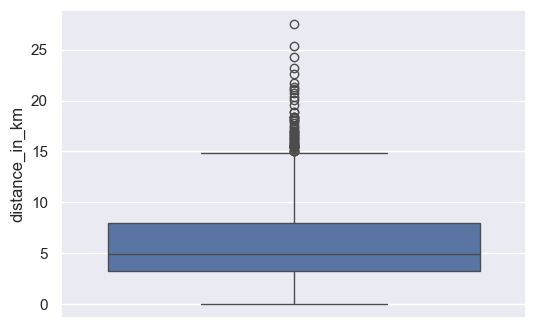

In [123]:
# The spread in distance covered.
sns.boxplot(uber['distance_in_km'])

## Shape of the Distribution

In [126]:
uber.describe()['earnings_euro']

count    720.000000
mean      12.896611
min        6.160000
25%        8.717500
50%       11.855000
75%       15.725000
max       40.870000
std        5.316796
Name: earnings_euro, dtype: float64

In [128]:
uber['earnings_euro'].skew()

1.0670739841501928

In [130]:
uber['earnings_euro'].kurtosis()

1.250823916064515

<Axes: xlabel='earnings_euro', ylabel='Density'>

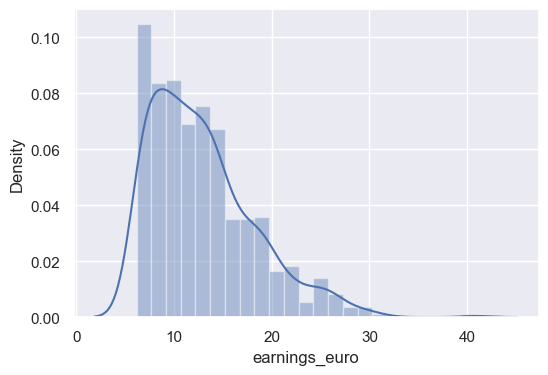

In [132]:
# The majority of the earnings is with in 8 to 15 euro per trip. the distribution is not normaly distributed around the mean and it is positively skewed.
sns.distplot(uber['earnings_euro'], hist = True)

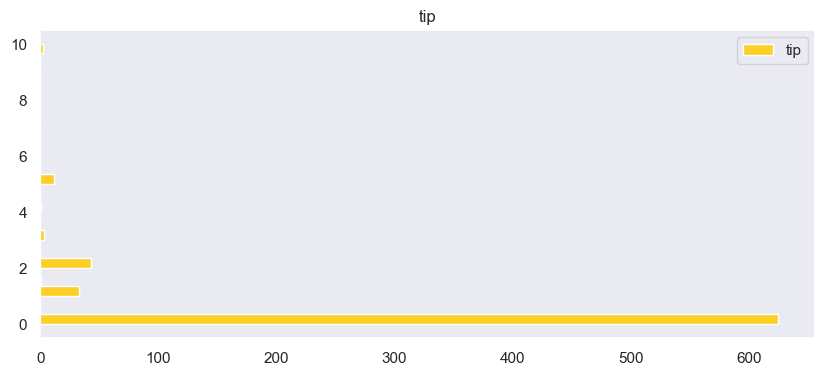

In [134]:
# The majority of the time, riders do not leave a tip.
uber.hist(column='tip',
       grid=False,
       figsize=(10, 4),
       legend=True,
       bins=30,
       orientation='horizontal',
       color='#FCCF26');

### Correlation Coefficients

In [137]:
uber.head(2)

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-01 15:23:00,0:25:17,7.49,1071,1019,19.31,4.83,1.01,13.47,0.0,0.0,0.0,15,Friday


In [139]:
core = uber[['earnings_euro', 'distance_in_km']]
core.head()

,earnings_euro,distance_in_km
catagory,,
Saver,26.13,17.02
UberX,13.47,7.49
Saver,8.77,3.45
UberX,22.72,15.37
Saver,6.75,2.76


In [141]:
co = core.corr().round(2)

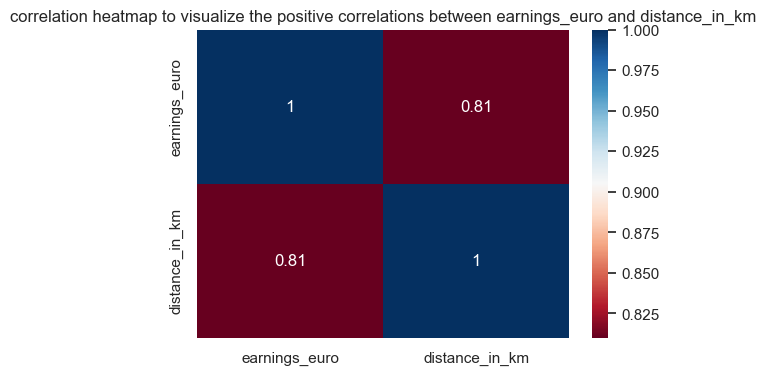

In [143]:
sns.heatmap(co, annot=True, cmap="RdBu")
plt.title("correlation heatmap to visualize the positive correlations between earnings_euro and distance_in_km")
plt.show()

<Axes: xlabel='earnings_euro', ylabel='distance_in_km'>

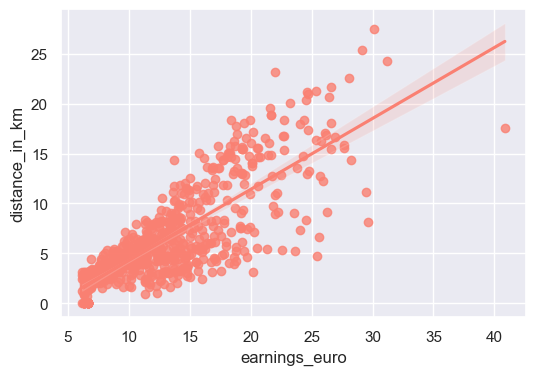

In [145]:
# scater plots showing the Linear correlation between earnings_euro and distance_in_km.
sns.regplot(x='earnings_euro', y='distance_in_km',data=core, color='salmon', scatter=True,fit_reg=True)

# Data Processing
## X-y Split

In [148]:
# making a copy
uber_model = uber.copy()

In [150]:
uber_model.head(2)

,date_time,duration,distance_in_km,pickup_by_postcode,dropoff_by_postcode,fare_euro,service_fee_euro,tax,earnings_euro,third_parties,tip,promotion,hour,day_name
catagory,,,,,,,,,,,,,,
Saver,2023-12-01 14:28:00,0:44:42,17.02,1181,1054,33.93,6.45,1.35,26.13,0.0,0.0,0.0,14,Friday
UberX,2023-12-01 15:23:00,0:25:17,7.49,1071,1019,19.31,4.83,1.01,13.47,0.0,0.0,0.0,15,Friday


In [152]:
X = uber_model[['distance_in_km','pickup_by_postcode','dropoff_by_postcode','hour','service_fee_euro','tax','fare_euro','promotion','tip']]
y = uber_model["earnings_euro"]

# Modeling
## Train-Test Split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# The size of the data used in the test and train process.
print(f'100% of our data: {len(uber_model)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 720.
80% for training data: 576.
20% for test data: 144.


In [159]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [161]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [163]:
predictions[0:10]

array([ 7.54989119, 13.15975333, 15.99282721, 25.26822012,  8.67120546,
       16.11207887, 18.59418261, 10.63593565, 11.51012383,  7.48223878])

In [165]:
X_test.iloc[0]

distance_in_km            3.16
pickup_by_postcode     1013.00
dropoff_by_postcode    1043.00
hour                      8.00
service_fee_euro          1.52
tax                       0.32
fare_euro                 8.00
promotion                 0.00
tip                       0.00
Name: Saver, dtype: float64

In [167]:
y_test.iloc[0]

6.16

In [169]:
# Make a dataframe to compare

eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
catagory,,
Saver,6.16,7.549891
UberX,12.23,13.159753
Priority,15.66,15.992827
Priority,25.67,25.268220
UberX,7.88,8.671205
...,...,...
UberX,6.62,7.381419
UberX,19.10,14.926926
UberX,15.32,16.361727


# Reporting

In [172]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head(3)

,actual,pred,dif
catagory,,,
Saver,6.16,7.549891,1.389891
UberX,12.23,13.159753,0.929753
Priority,15.66,15.992827,0.332827


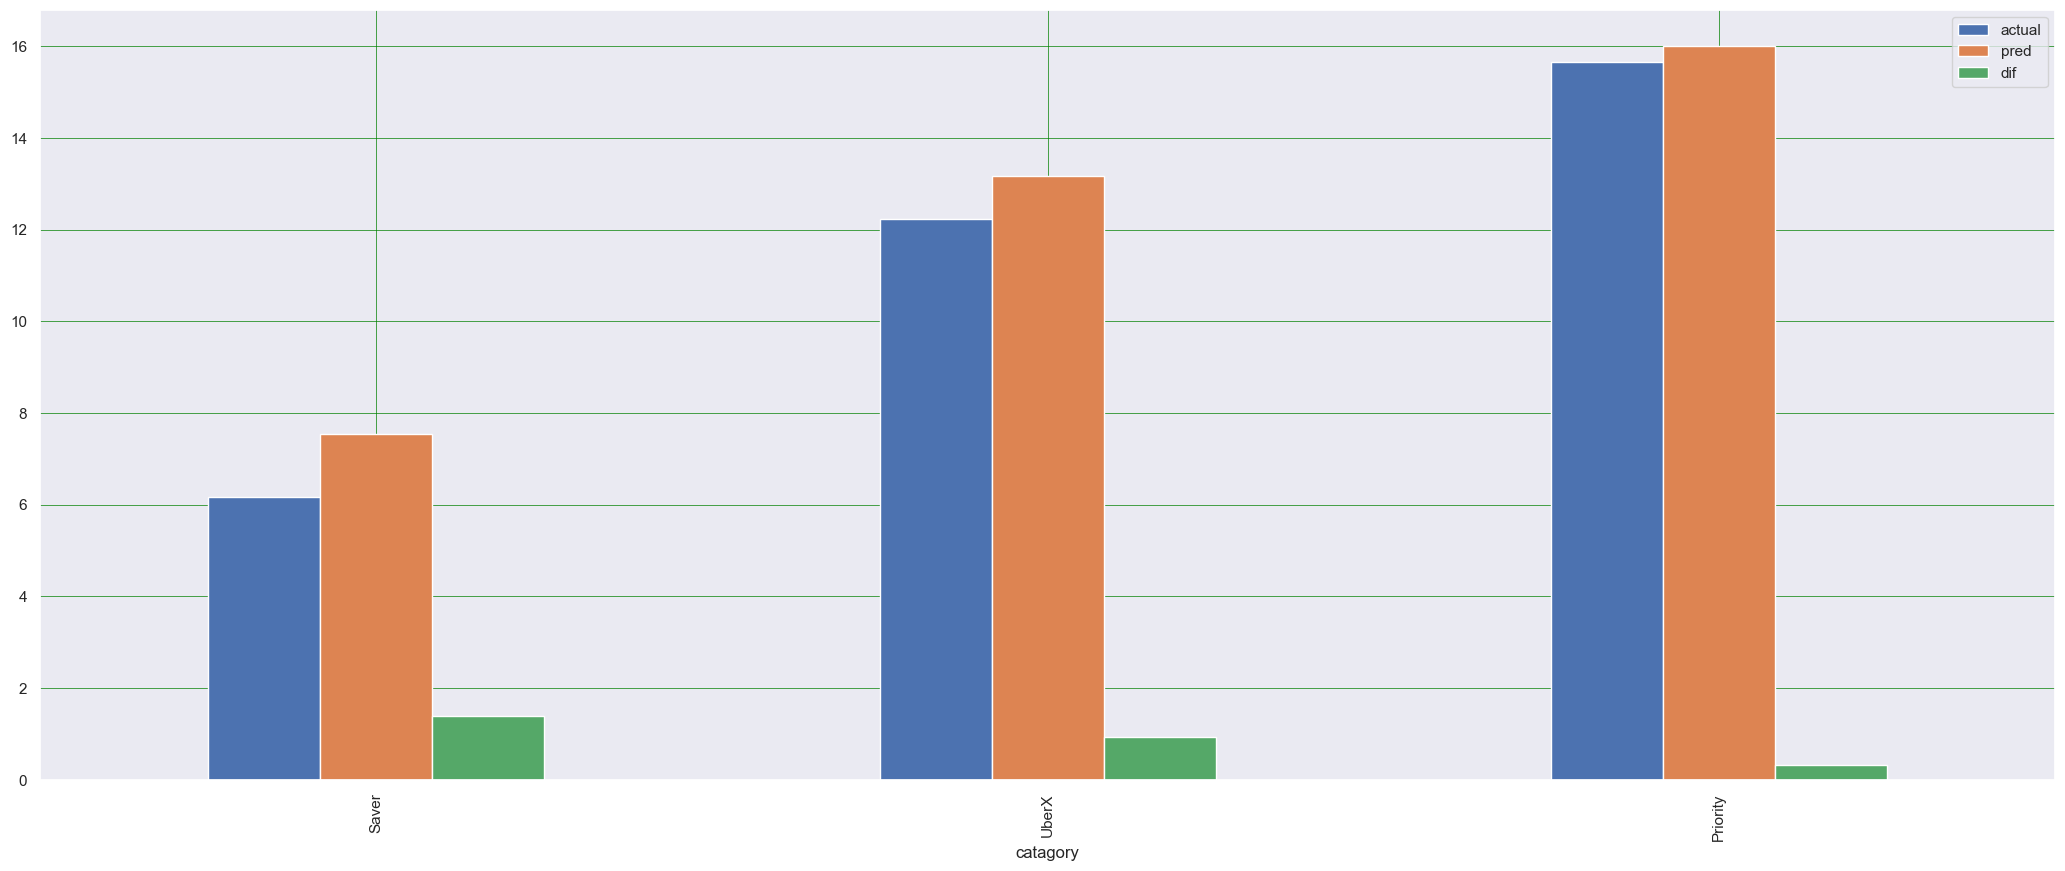

In [174]:
# A bar chart showing the diffrence between the actual data Vs. predicted values as well as the diffrence.
# Because the gap between the actual and pridicted values are close to each other,
# we can conclude that our model is working pretty well.
uber_model_vs = eval_df.head(3)
uber_model_vs.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='black')
plt.show()